### KNN from scratch
- Using Diamond dataset.
- Task is to predict the price of the Diamonds.

Data Description:-
    
    1. Title : Diamonds Dataset

2. the 7th column "price" is the values to be predicted.

3. Data Type : Mixed ( Numerical + Categorical)
	
4. Dataset has nearly 54000 instances.

5. It has 10 features.

6. Features 

	price : price in US dollars (\$326--\$18,823)

	carat : weight of the diamond (0.2--5.01)

	cut   : quality of the cut (Fair, Good, Very Good, Premium, Ideal)

	color : diamond colour, from J (worst) to D (best)

	clarity : a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

	x : length in mm (0--10.74)

	y : width in mm (0--58.9)

	z : depth in mm (0--31.8)

	depth : total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

	table : width of top of diamond relative to widest point (43--95)

7. Caution : Handle Categorical data before building a model. 



In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')



/Users/apple/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
Data = pd.read_csv(r"/Users/apple/Downloads/diamonds.csv")
Data.head()

Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75

In [3]:
Data.drop('Unnamed: 0',axis = 1,inplace = True)
Data

carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]

In [4]:
Data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [5]:
Data.shape

(53940, 10)

In [6]:
Data.describe().transpose()

count         mean          std    min     25%      50%      75%  \
carat  53940.0     0.797940     0.474011    0.2    0.40     0.70     1.04   
depth  53940.0    61.749405     1.432621   43.0   61.00    61.80    62.50   
table  53940.0    57.457184     2.234491   43.0   56.00    57.00    59.00   
price  53940.0  3932.799722  3989.439738  326.0  950.00  2401.00  5324.25   
x      53940.0     5.731157     1.121761    0.0    4.71     5.70     6.54   
y      53940.0     5.734526     1.142135    0.0    4.72     5.71     6.54   
z      53940.0     3.538734     0.705699    0.0    2.91     3.53     4.04   

            max  
carat      5.01  
depth     79.00  
table     95.00  
price  18823.00  
x         10.74  
y         58.90  
z         31.80

In [7]:
print(Data.color.unique())
print(Data.cut.unique())
print(Data.color.unique())

['E' 'I' 'J' 'H' 'F' 'G' 'D']
['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']


In [8]:
Data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [9]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [10]:
Data.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [11]:
cat_var = []
num_var = []

for i in Data.columns:
    if(Data[i].dtypes =='object'):
        cat_var.append(i)
    else:
        num_var.append(i)

In [12]:
print(cat_var)
print(num_var)

['cut', 'color', 'clarity']
['carat', 'depth', 'table', 'price', 'x', 'y', 'z']


### Lets check the relaiton between dependent and independent variables.
- This is a regression model.
- price dependent feature & rest are independent.



<Figure size 1600x1200 with 0 Axes>

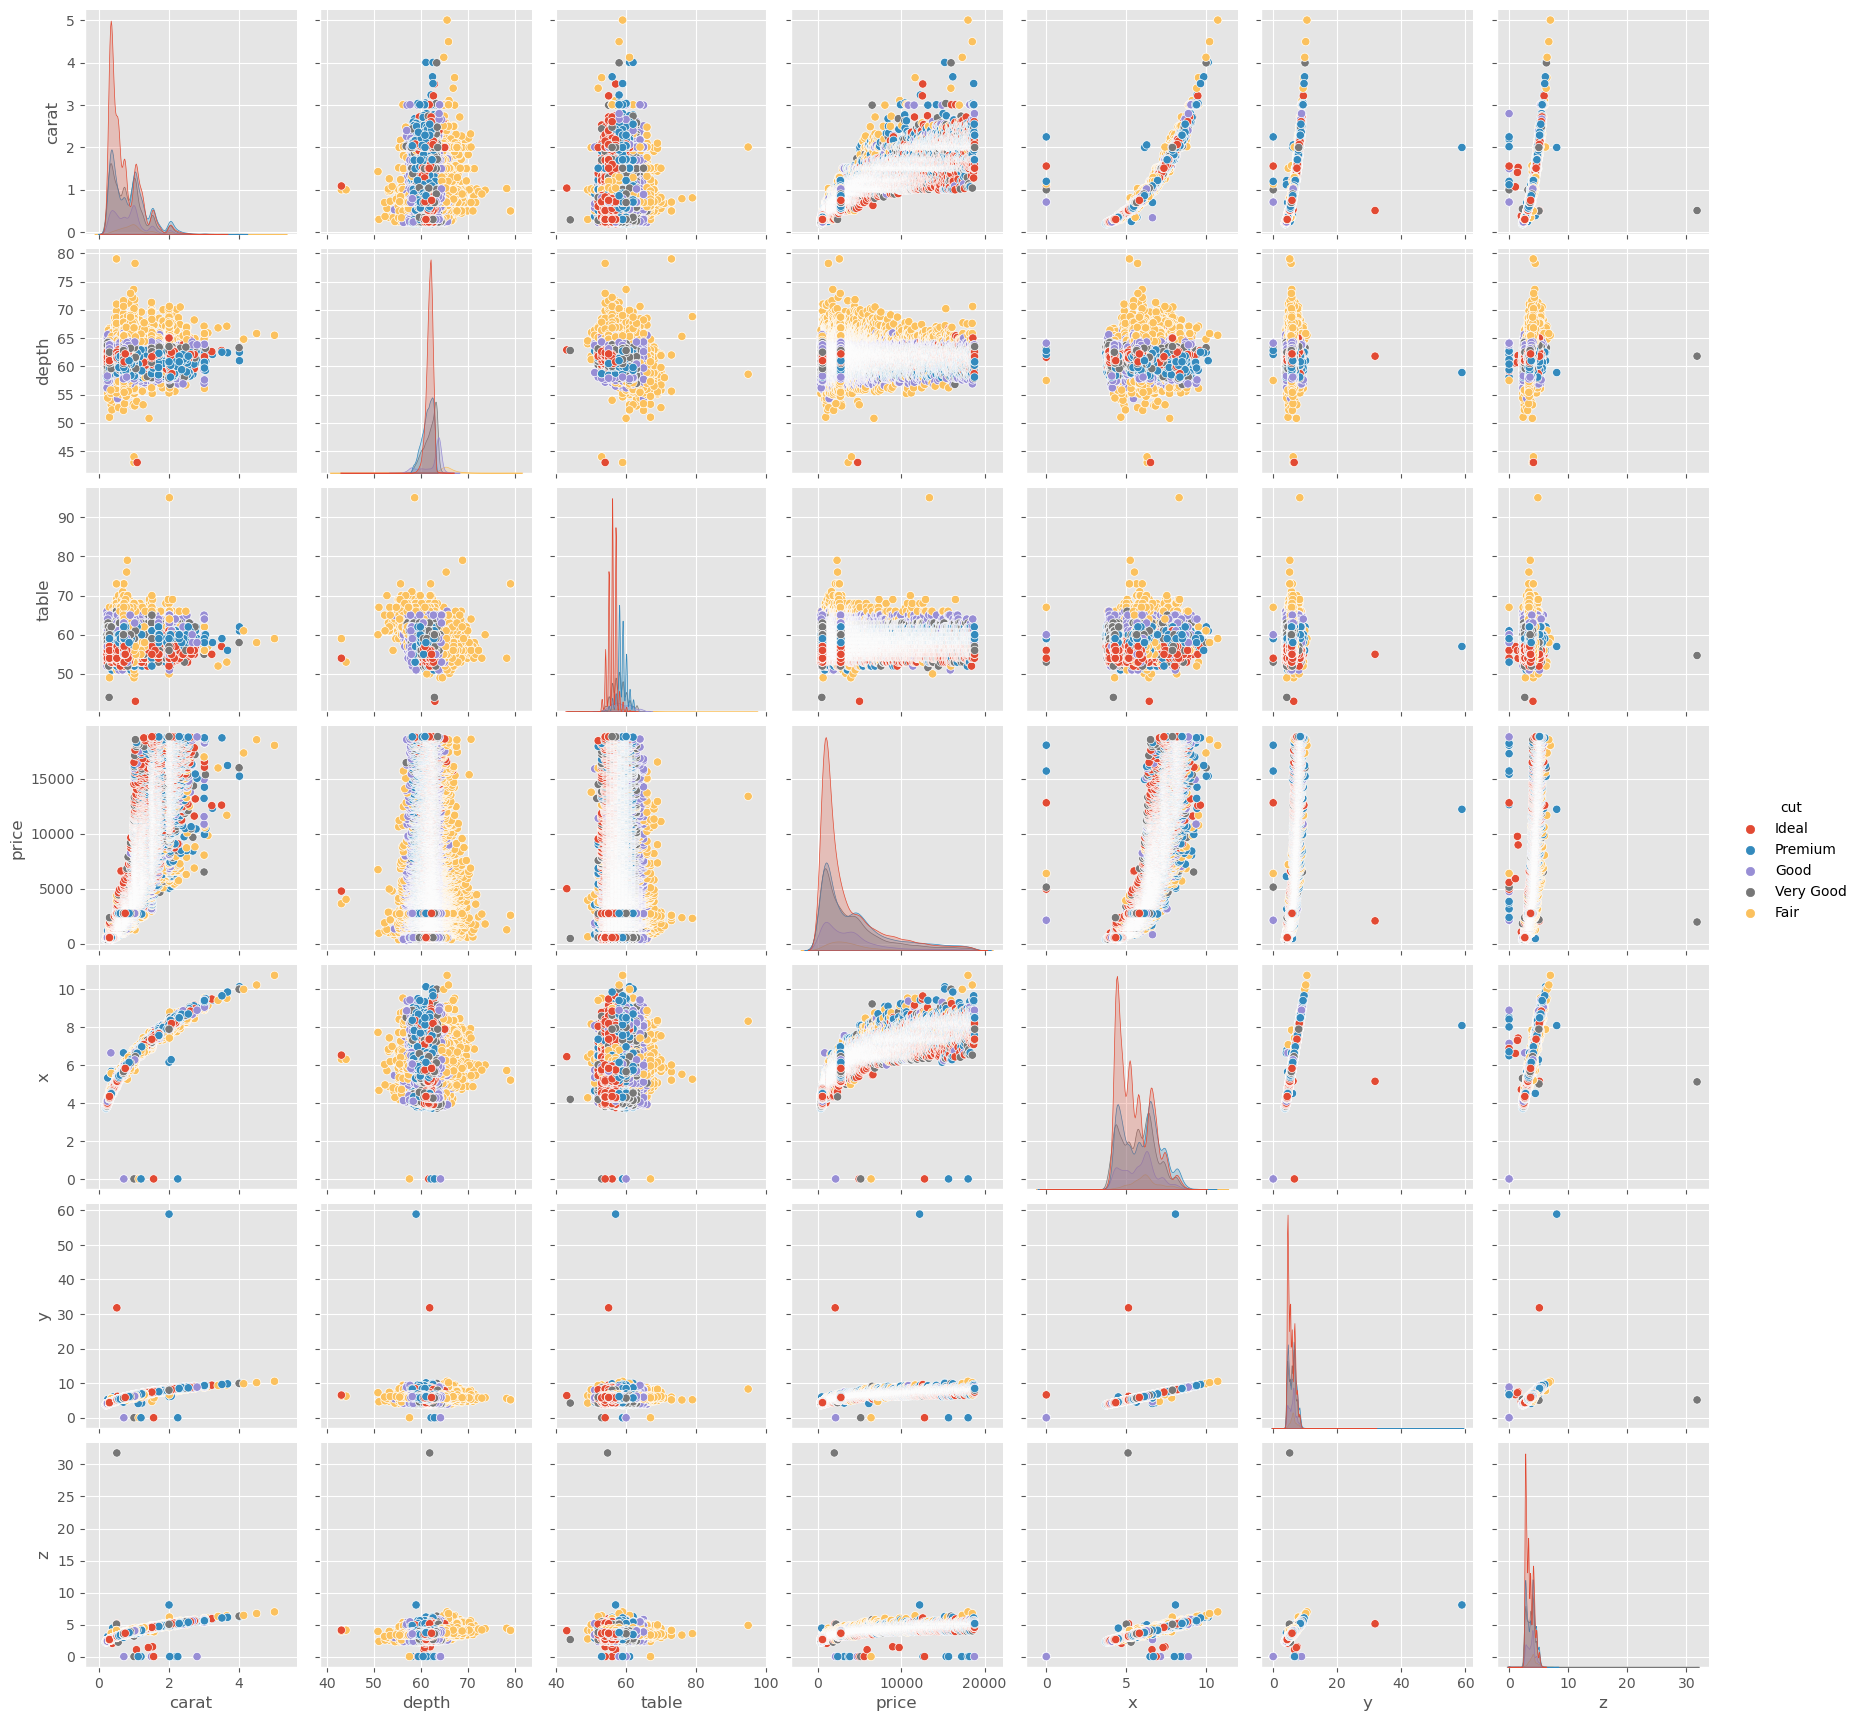

In [13]:
plt.figure(figsize=(8,6),dpi=200)

sns.pairplot(Data,hue = 'cut')
plt.show()

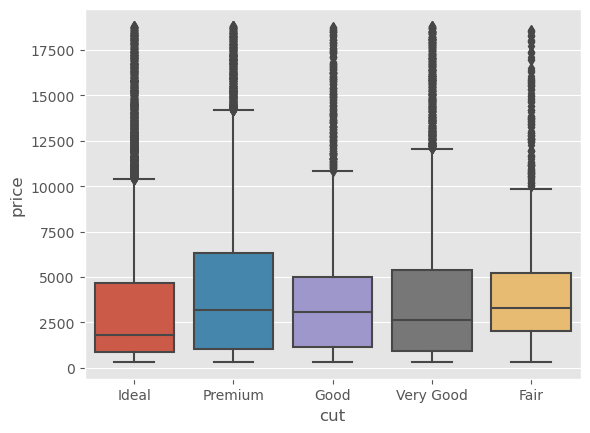

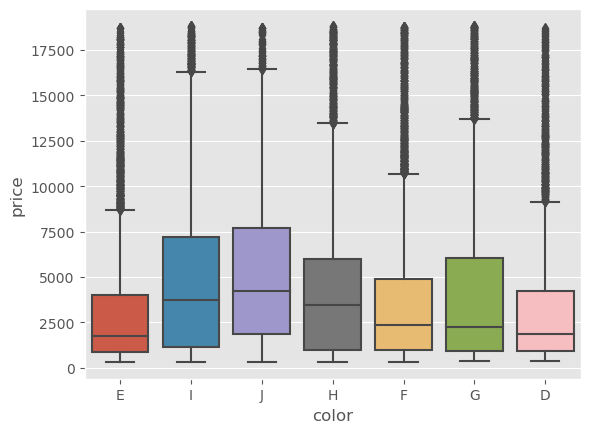

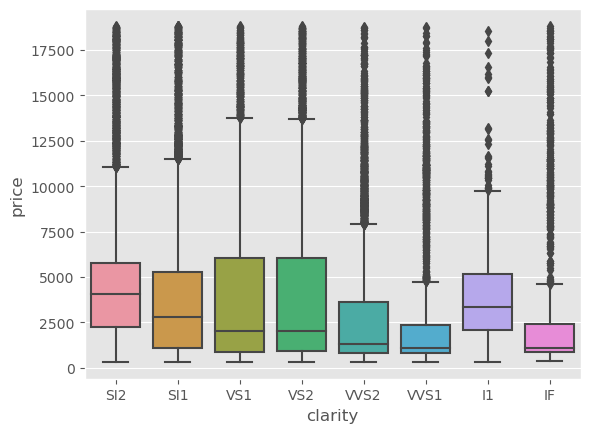

In [14]:
### cat_var vs price

cols = ['cut','color','clarity']
for i in cols:

        sns.boxplot(data= Data,x=Data[i],y=Data['price'])
        plt.show()

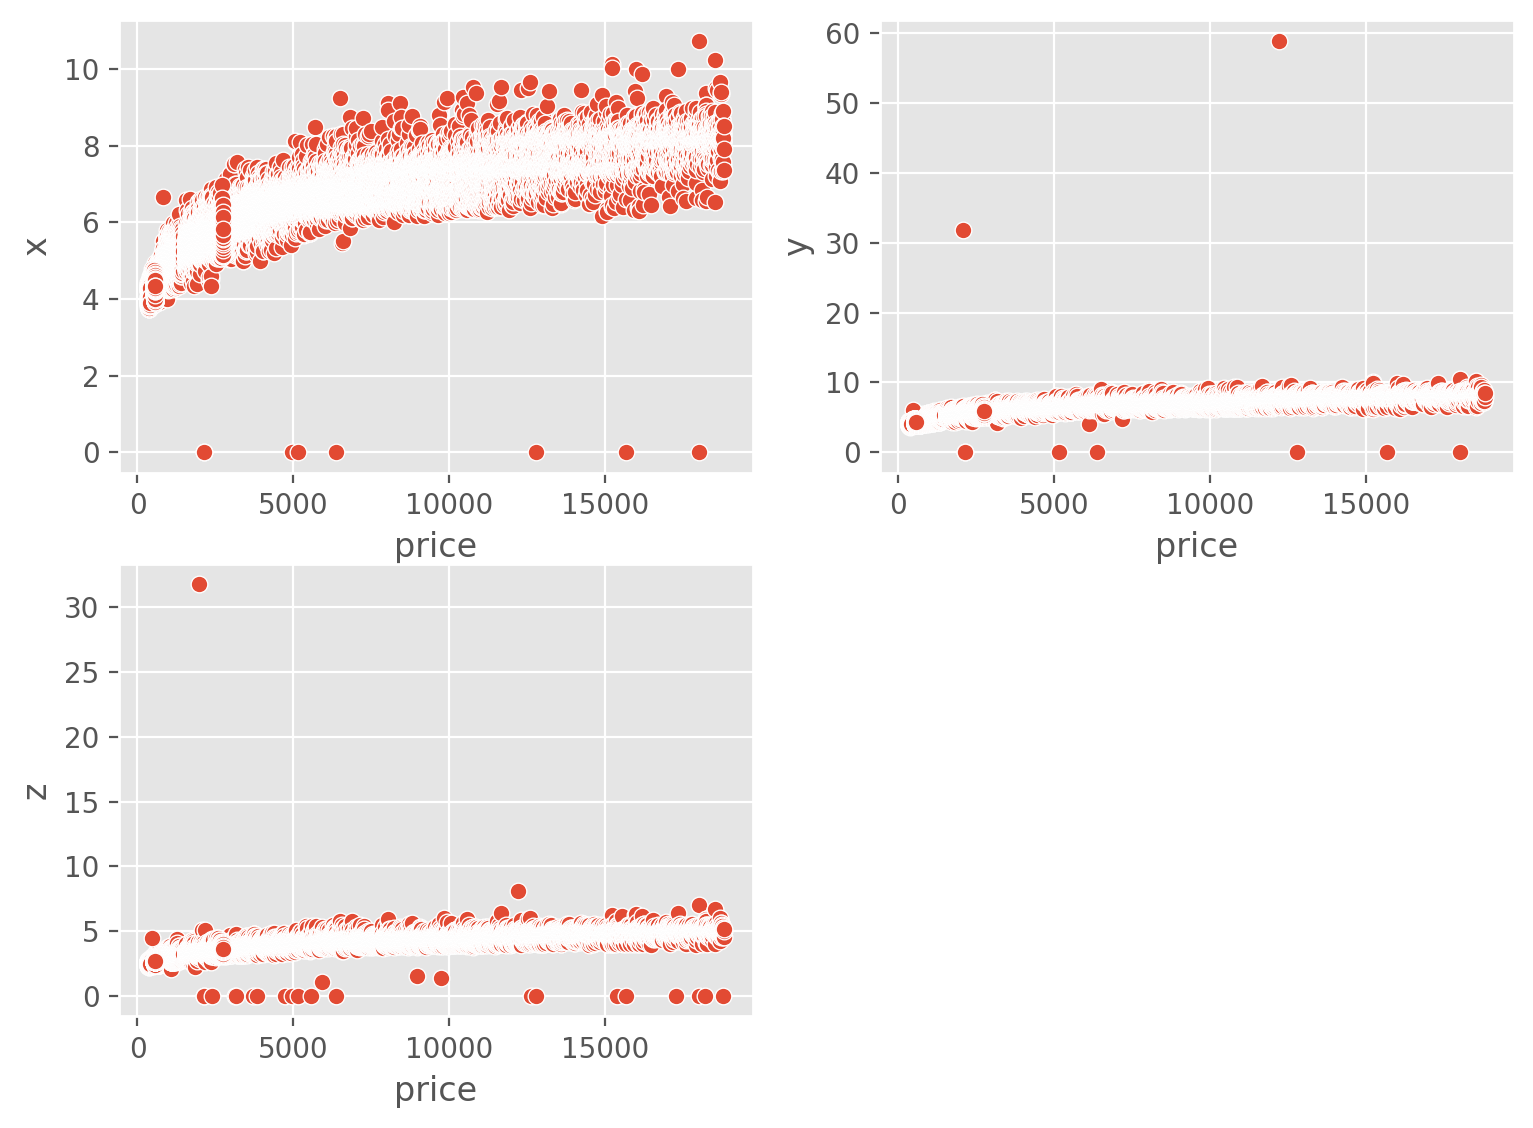

In [15]:
#### num_var vs price 
#num_var 


plt.figure(figsize=(9,10),dpi=200)
plt.subplot(3,2,1)
sns.scatterplot(data=Data,x=Data['price'],y= Data['x'])

plt.subplot(3,2,2)
sns.scatterplot(data= Data,x=Data['price'],y= Data['y'])

plt.subplot(3,2,3)
sns.scatterplot(data = Data,x= Data['price'],y= Data['z'])

#plt.subplot(3,2,4)
#sns.scatterplot(data=Data,x=Data['price'],y=Data[''])



plt.show()

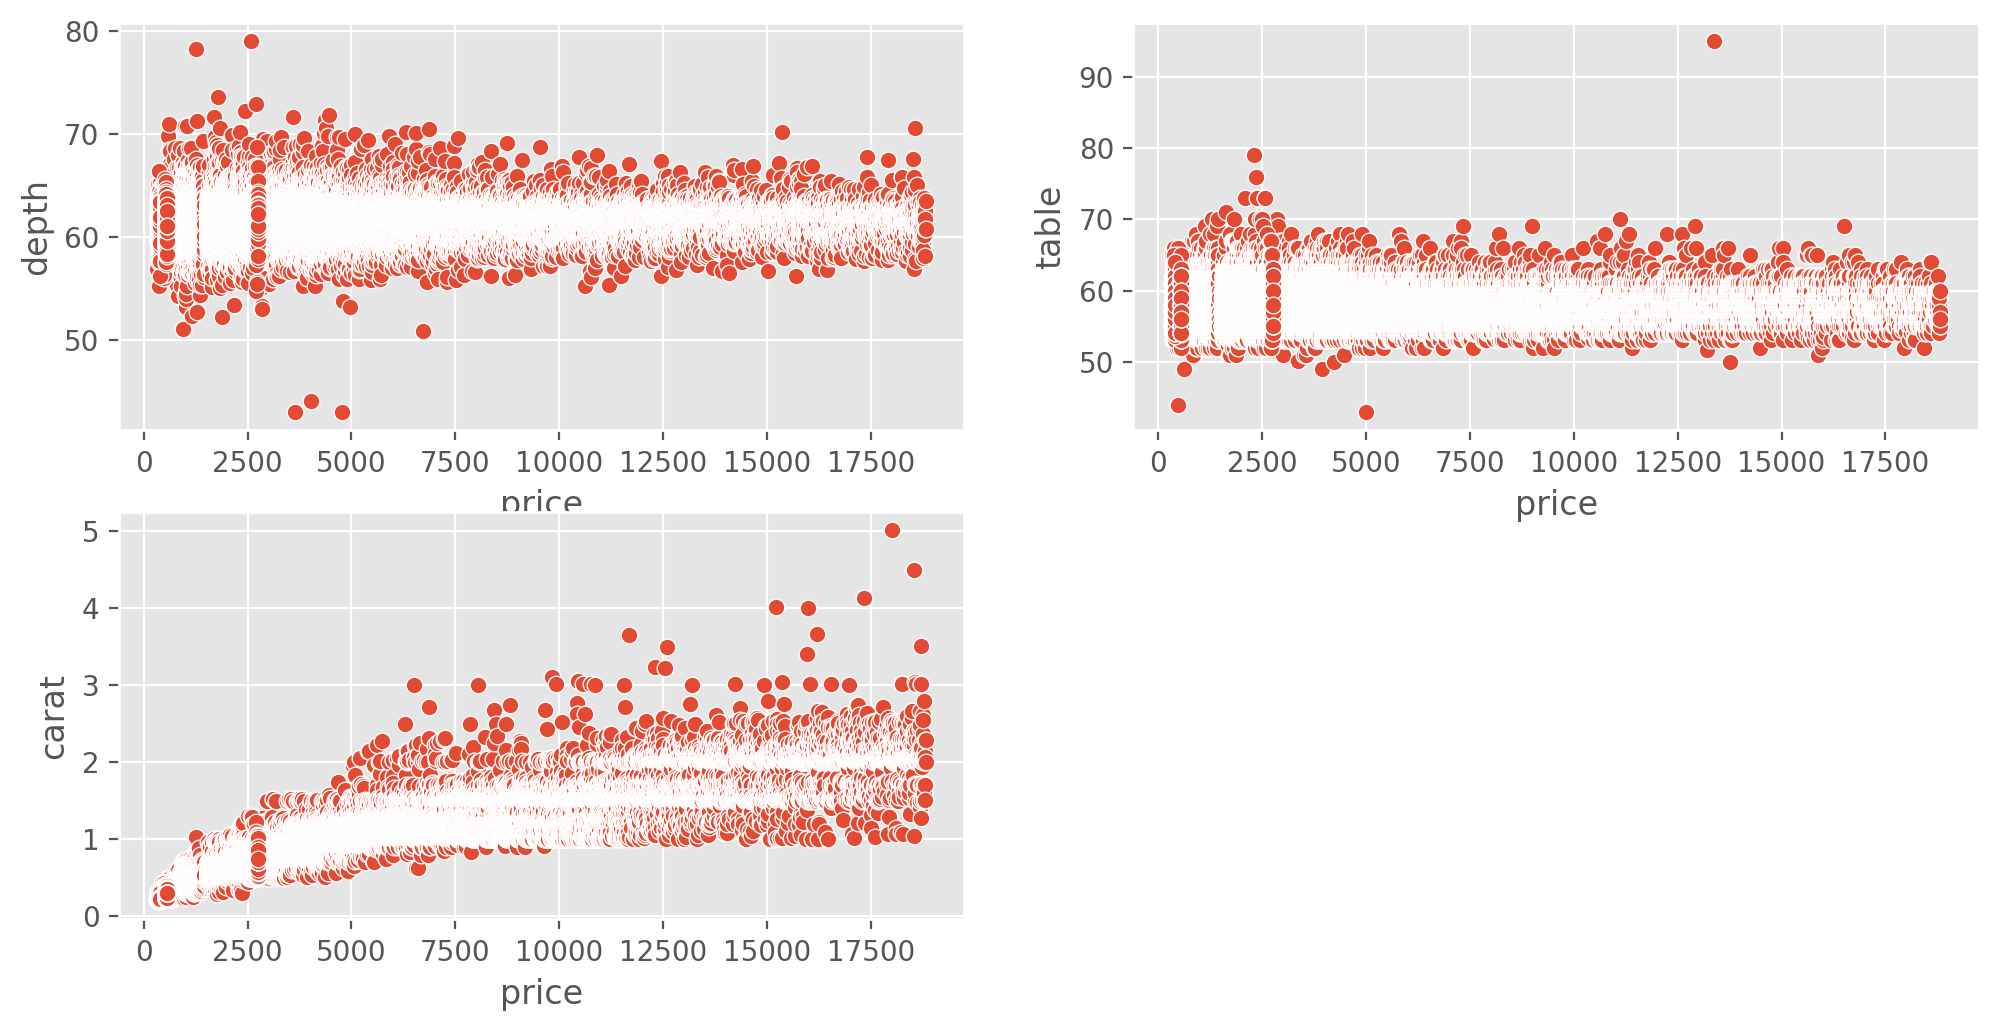

In [16]:
plt.figure(figsize=(12,9),dpi=200)

plt.subplot(3,2,1)
sns.scatterplot(data=Data,x=Data['price'],y=Data['depth'])

plt.subplot(3,2,2)
sns.scatterplot(data= Data,x=Data['price'],y= Data['table'])

plt.subplot(3,2,3)
sns.scatterplot(data=Data,x=Data['price'],y=Data['carat'])

plt.show()

## ----------------------------

## Outliers

In [17]:
outliers = pd.DataFrame(columns=['features','outliers'])

for i in list(Data):
    Q1 = Data.quantile(0.25)
    Q3 = Data.quantile(0.75)
    
    #calculate the IQR
    IQR = Q3-Q1
    
    ##outlier detection
    IQR_OUTLIERS = Data[((Data <(Q1- 1.5 * IQR))|(Data >(Q3 + 1.5 *IQR))).any(axis = 1)]
    

In [18]:
IQR_OUTLIERS

carat        cut color clarity  depth  table  price     x     y     z
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
8       0.22       Fair     E     VS2   65.1   61.0    337  3.87  3.78  2.49
24      0.31  Very Good     J     SI1   58.1   62.0    353  4.44  4.47  2.59
35      0.23       Good     F     VS1   58.2   59.0    402  4.06  4.08  2.37
42      0.26       Good     D     VS2   65.2   56.0    403  3.99  4.02  2.61
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53882   0.71       Fair     D     VS1   65.4   59.0   2747  5.62  5.58  3.66
53886   0.70       Good     D     VS2   58.0   62.0   2749  5.78  5.87  3.38
53890   0.73       Good     E     SI1   57.9   55.0   2749  6.00  5.96  3.46
53895   0.70       Good     F     VS1   57.8   61.0   2751  5.83  5.79  3.36
53927   0.79       Good     F     SI1   58.1   59.0   2756  6.06  6.13  3.54

[6416 rows x 10 columns]

In [19]:
Data = Data[~((Data <(Q1- 1.5 * IQR))|(Data >(Q3+1.5 * IQR))).any(axis=1)]

######
- Observation :
- we can see the changes in data before and after outliers ,lets visualize for better understanding . 
######


### After outliers Treatment.

In [20]:
### After outliers shape of data.
Data.shape

(47524, 10)

<Figure size 2000x1800 with 0 Axes>

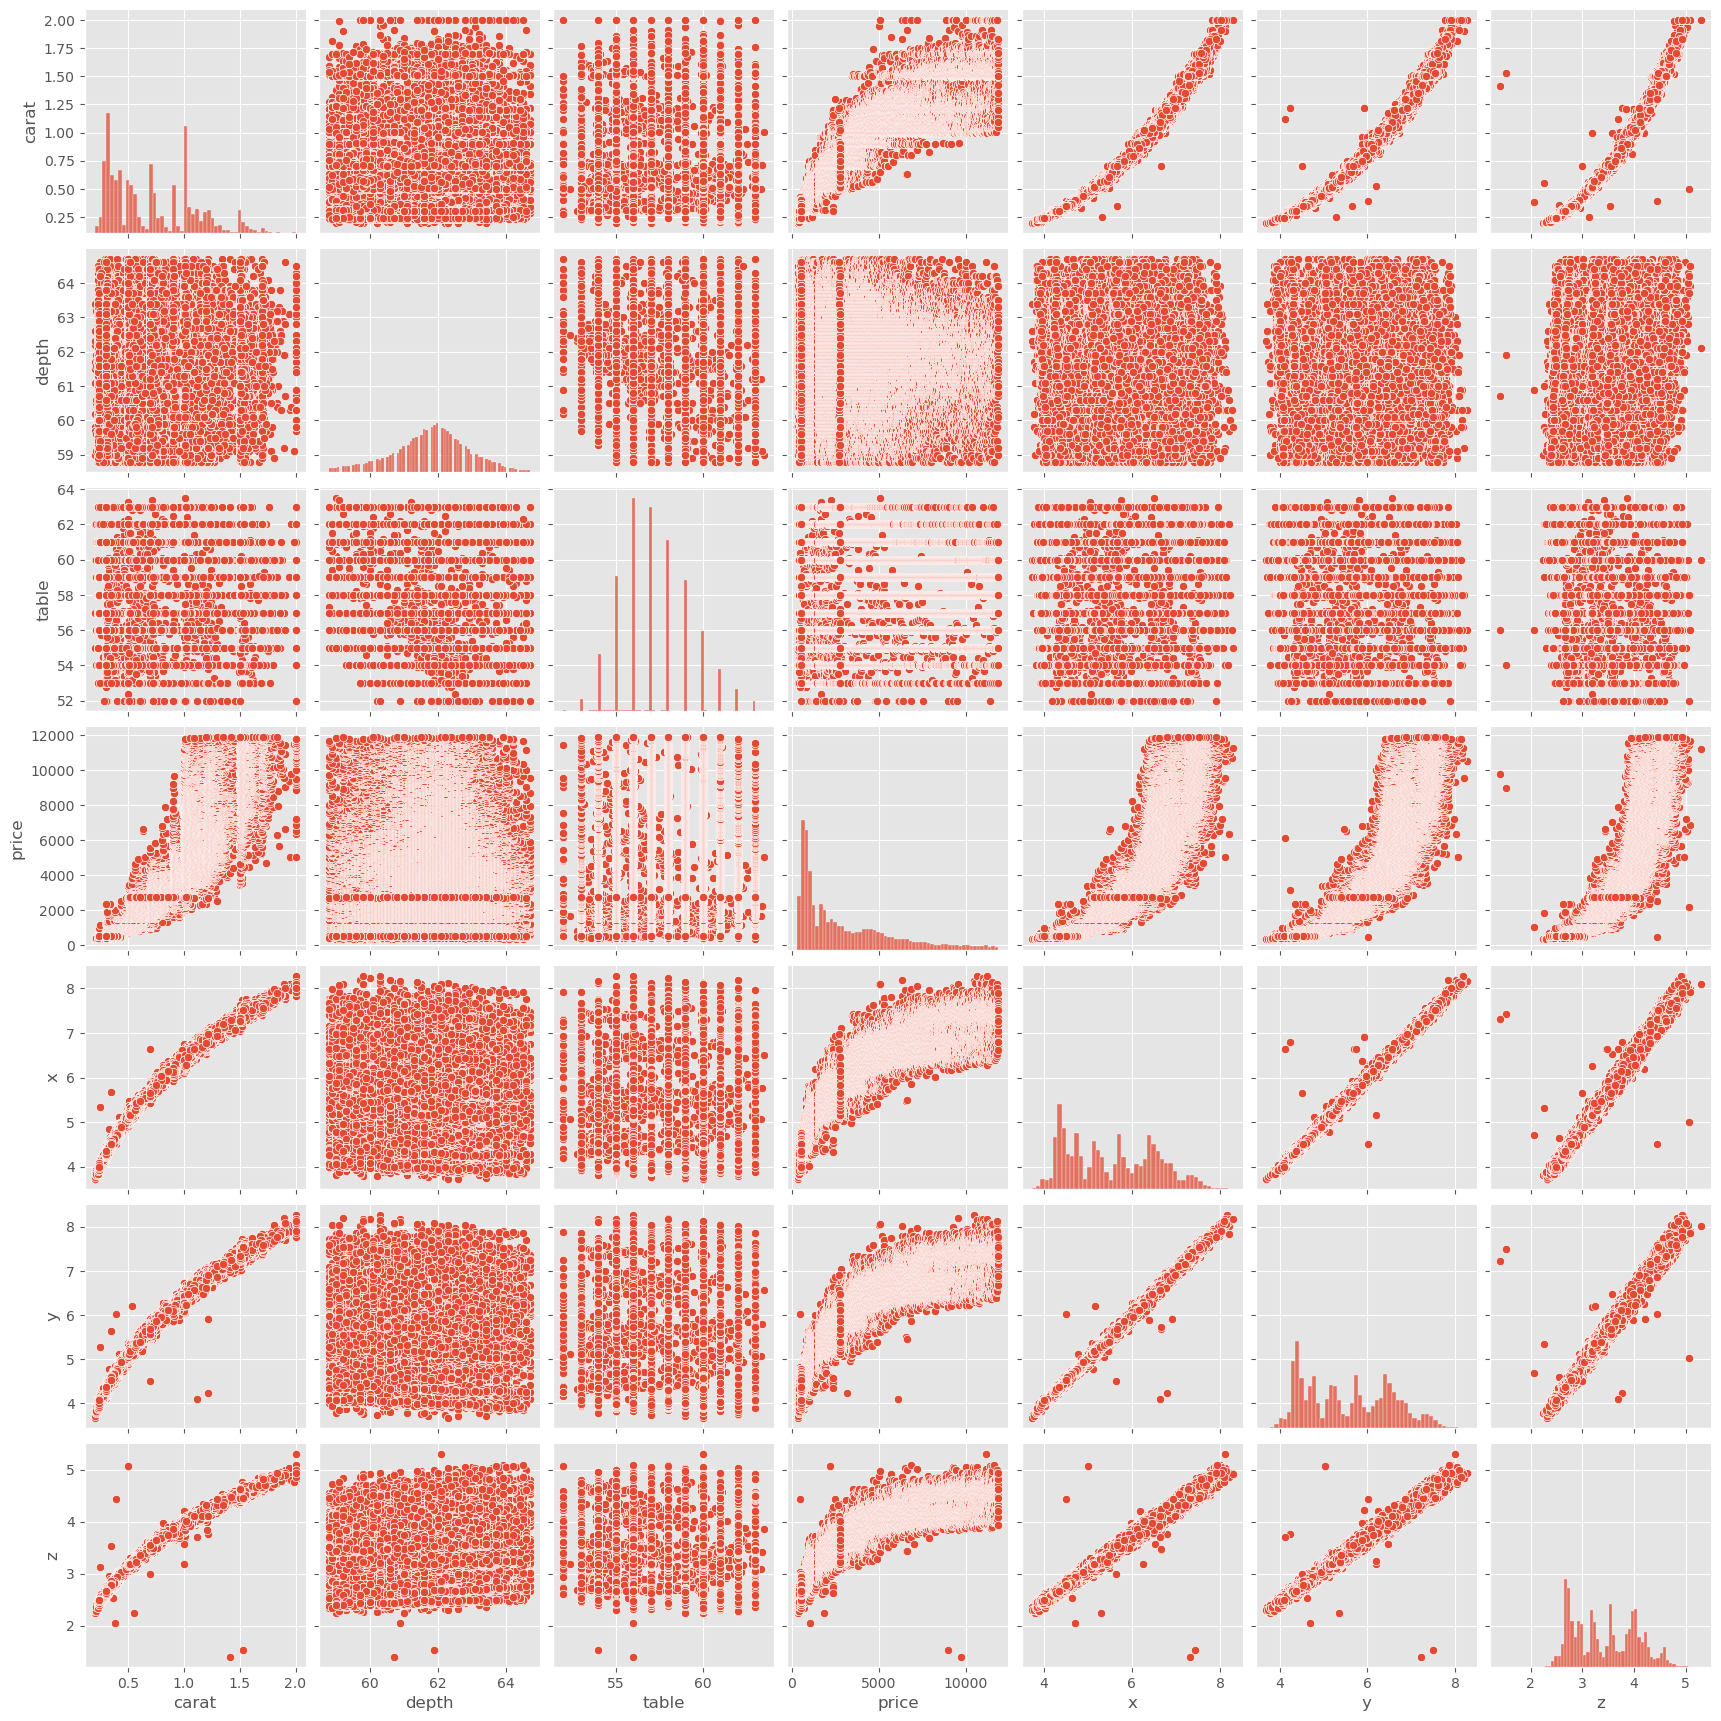

In [21]:
plt.figure(figsize=(10,9),dpi=200)
sns.pairplot(Data)
plt.show()

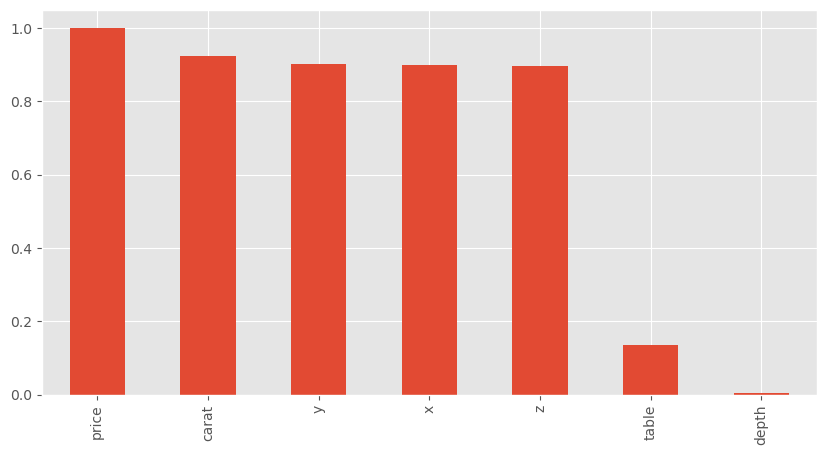

In [22]:
corr_mat = Data.corr()
plt.figure(figsize = (10,5))
corr_mat['price'].sort_values(ascending = False).plot(kind = 'bar');

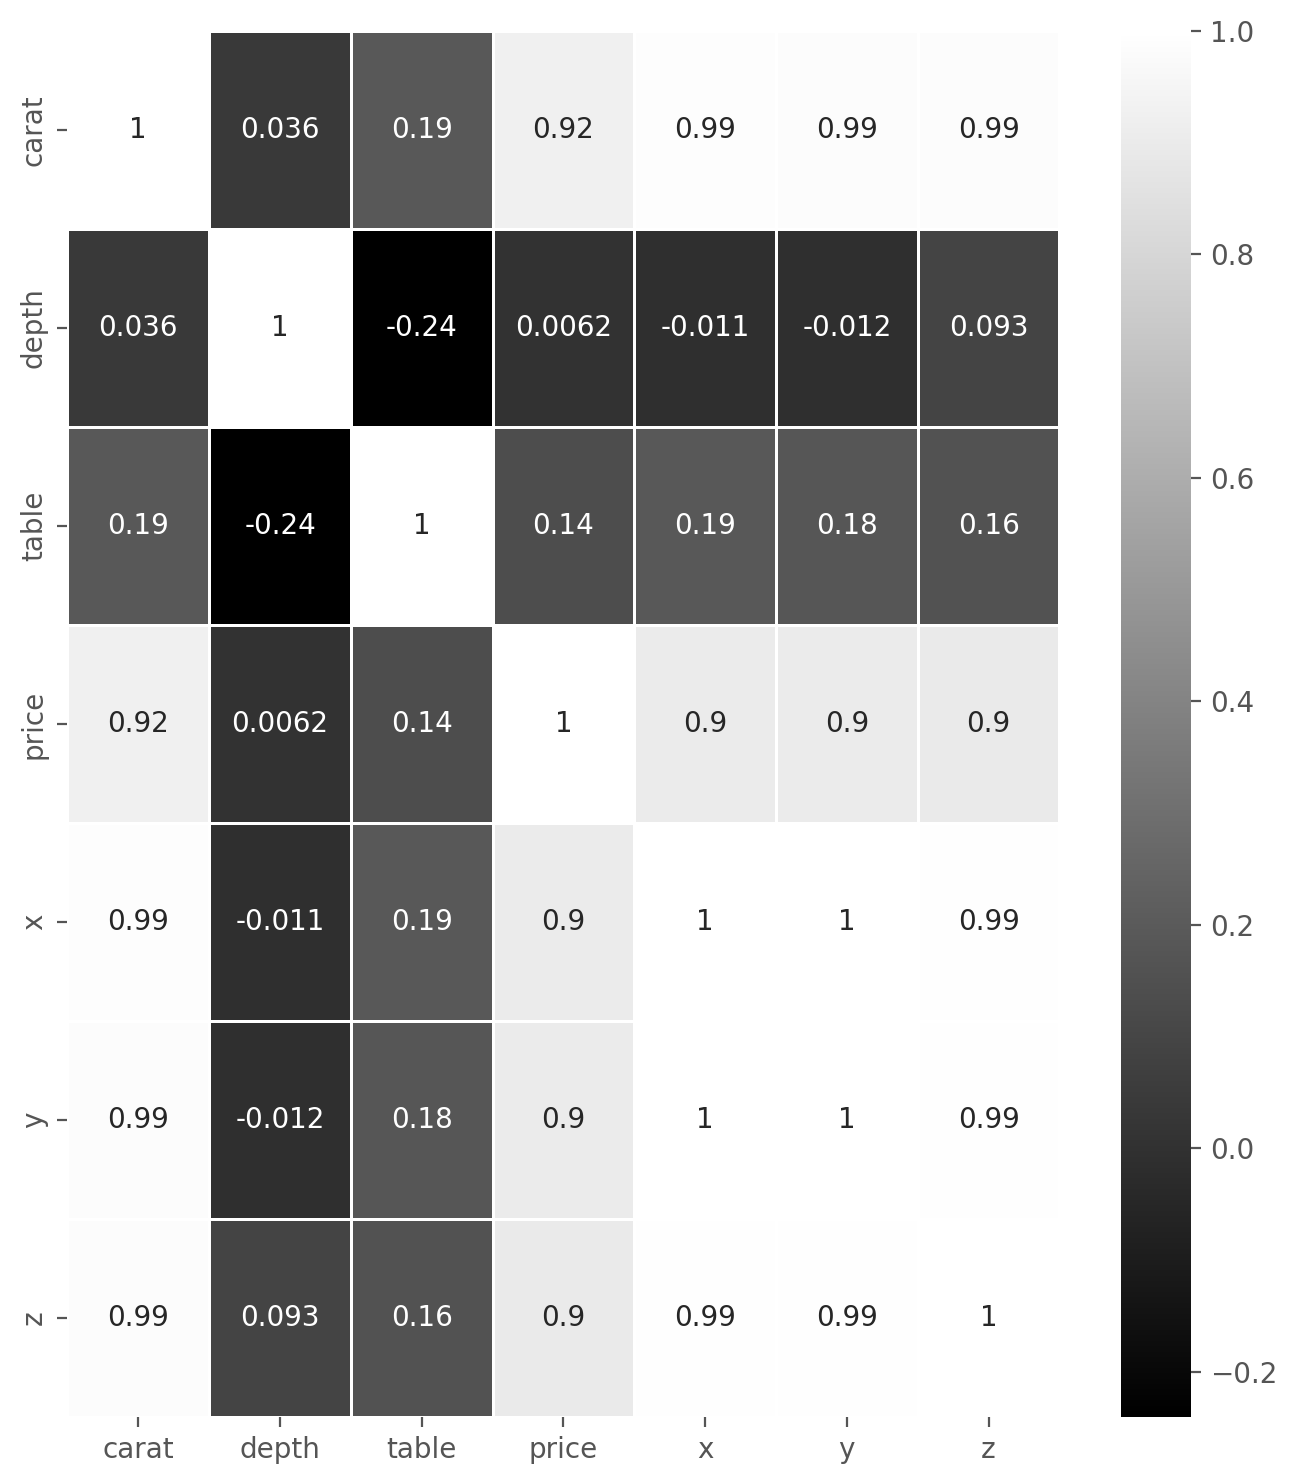

In [23]:
## comparing other Features with Target column(Price).
plt.figure(figsize=(8,9),dpi=200)
sns.heatmap(Data.corr(),linewidths=.5,annot=True,cmap='gist_gray')
plt.show()

##Observation:- Their is a strong correlation between price with x,y & z .

# KNN algorithm .

####### HANDLING CATEGORICAL COLUMNS CONVERT THEM INTO NUMERIC VALUES.

In [24]:
Data.head()

carat        cut color clarity  depth  table  price     x     y     z
0   0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
3   0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
5   0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48

In [36]:
x = Data.drop('price',axis= 1)
y = Data['price']

### Label Encoding!

In [37]:
## label encoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

Data['cut']=le.fit_transform(Data[['cut']])
Data['color']=le.fit_transform(Data[['color']])
Data['clarity']=le.fit_transform(Data[['clarity']])

### Standard scaler

In [38]:
## standard scaler
from sklearn import preprocessing
ss = preprocessing.StandardScaler()
Data['cut']=ss.fit_transform(Data[['cut']].astype(float))
Data['color']=ss.fit_transform(Data[['color']].astype(float))
Data['clarity']=ss.fit_transform(Data[['clarity']].astype(float))

#### encoding to convert the values into numeric .
------------
- LabelEncoding  
- standerscaler(sclaing the mean values)

In [39]:
Data['cut'].unique()

array([-0.66005228,  0.39619139, -1.71629596,  1.45243507, -2.77253963])

In [40]:
Data['clarity'].unique()

array([-0.51163347, -1.08947203,  0.64404366,  1.79972078,  1.22188222,
        0.0662051 , -2.24514915, -1.66731059])

In [41]:
Data['color'].unique()

array([-0.91198734,  1.46356105,  2.05744814,  0.86967395, -0.31810025,
        0.27578685, -1.50587444])

In [42]:
Data.describe()

carat           cut         color       clarity         depth  \
count  47524.000000  4.752400e+04  4.752400e+04  4.752400e+04  47524.000000   
mean       0.708700  1.101047e-14 -1.093102e-14 -1.717318e-15     61.786512   
std        0.371104  1.000011e+00  1.000011e+00  1.000011e+00      1.105911   
min        0.200000 -2.772540e+00 -1.505874e+00 -2.245149e+00     58.800000   
25%        0.380000 -6.600523e-01 -9.119873e-01 -1.089472e+00     61.100000   
50%        0.600000 -6.600523e-01  2.757869e-01  6.620510e-02     61.900000   
75%        1.010000  3.961914e-01  8.696739e-01  6.440437e-01     62.500000   
max        2.000000  1.452435e+00  2.057448e+00  1.799721e+00     64.700000   

              table         price             x             y             z  
count  47524.000000  47524.000000  47524.000000  47524.000000  47524.000000  
mean      57.260186   3109.662381      5.546656      5.551478      3.428376  
std        2.021552   2749.696633      0.979906      0.973990      0.606158  
min       52.000000    326.000000      3.730000      3.680000      1.410000  
25%       56.000000    890.000000      4.640000      4.650000      2.860000  
50%       57.000000   2061.000000      5.440000      5.450000      3.360000  
75%       59.000000   4636.250000      6.410000      6.410000      3.980000  
max       63.500000  11883.000000      8.280000      8.270000      5.300000

In [43]:
Data

carat       cut     color   clarity  depth  table  price     x     y  \
0       0.23 -0.660052 -0.911987 -0.511633   61.5   55.0    326  3.95  3.98   
1       0.21  0.396191 -0.911987 -1.089472   59.8   61.0    326  3.89  3.84   
3       0.29  0.396191  1.463561  0.644044   62.4   58.0    334  4.20  4.23   
4       0.31 -1.716296  2.057448 -0.511633   63.3   58.0    335  4.34  4.35   
5       0.24  1.452435  2.057448  1.799721   62.8   57.0    336  3.94  3.96   
...      ...       ...       ...       ...    ...    ...    ...   ...   ...   
53935   0.72 -0.660052 -1.505874 -1.089472   60.8   57.0   2757  5.75  5.76   
53936   0.72 -1.716296 -1.505874 -1.089472   63.1   55.0   2757  5.69  5.75   
53937   0.70  1.452435 -1.505874 -1.089472   62.8   60.0   2757  5.66  5.68   
53938   0.86  0.396191  0.869674 -0.511633   61.0   58.0   2757  6.15  6.12   
53939   0.75 -0.660052 -1.505874 -0.511633   62.2   55.0   2757  5.83  5.87   

          z  
0      2.43  
1      2.31  
3      2.63  
4      2.75  
5      2.48  
...     ...  
53935  3.50  
53936  3.61  
53937  3.56  
53938  3.74  
53939  3.64  

[47524 rows x 10 columns]

## split the data for training and testing .

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.75, random_state = 100)

In [45]:
print('Training Data Shape   : ', x_train.shape)
print('Training Labels Shape : ', y_train.shape)
print('Testing Data Shape    : ', x_test.shape)
print('Testing Labels Shape  : ', y_test.shape)

Training Data Shape   :  (35643, 9)
Training Labels Shape :  (35643,)
Testing Data Shape    :  (11881, 9)
Testing Labels Shape  :  (11881,)


###----------------

### Experiment -1 

In [46]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors=5)
regressor.fit(x_train,y_train)

KNeighborsRegressor()

In [47]:
from sklearn.metrics import r2_score
y_pred_train = regressor.predict(x_train)
y_pred_test = regressor.predict(x_test)

print('Traning score',r2_score(y_train,y_pred_train))
print('Test score :',r2_score(y_test,y_pred_test))

Traning score 0.9643462327598926
Test score : 0.9418475203439285


Experiment -2

## Implementing Knn from Scratch. 

In [48]:
def Euclidean_dist(x_train,x_test):
    distance=0.0
    for i in range(len(x_train)):
        distance += (x_train[i]-x_test[i])**2
    return math.sqrt(distance)

##### NEAREST NEIGHBORS:

In [49]:
def Nearest_neighbors(train,test_obs,n):
    neighbor_distance= []
    for i in range(len(train)):
        l1=list(train.iloc[i,:])+[Euclidean_dist(train.iloc[i,:-1],test_obs)]
        neighbor_distance= neighbor_distance+[l1]
    neighbor_distance.sort(key=lambda x: x[-1])
    nearest_neighbors= [neighbor_distance[i] for i in range(0,n)]
    y_pred= [i[-2] for i in nearest_neighbors]
    return(int(max(y_pred,key=y_pred.count)))

### predict

In [50]:
def Prediction(train,test_obs,n):
    
    NN=Nearest_neighbors(train,test_obs,3)
    M= [i[n-1] for i in NN]
    
    return(test_obs+[max(M)])

%%time
final=[]
k=10
for i in range(0,x_test.shape[0]):
    dis=np.power(np.sum((np.power((x_train.values - x_test.values[i]),2)),axis=1),1/2)
    indh=x_train.index.values
    knn=(pd.DataFrame({"Distance":dis},index=indh))
    indo=knn.sort_values(by=["Distance"])[:k]
    sum=0
    for i in indo.index:
        sum+=y_train[i]
    print(sum/k)
    final.append(sum/k)

indh_test=x_test.index.values
pred_test=pd.Series(data=final,index=indh_test)

In [55]:
import pickle
saved_model = open("regressor.pkl", "wb")
# Save the trained model as a pickle string.
pickle.dump(regressor,saved_model)

In [57]:
saved_model.close()

-------------------------------------------------------------